##### Wholesale customers: 
The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories


##### Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);\
2) MILK: annual spending (m.u.) on milk products (Continuous);\
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);\
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)\
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)\

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

### Read data as a pandas dataframe

In [2]:
df = pd.read_csv('/Users/richa/Desktop/Wholesale customers data.csv')

### Get the first 5 rows of the data.

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Total rows and col in the data

In [4]:
df.shape

(440, 8)

### Check for NULL values

In [5]:
df.isnull().sum().to_frame('Null_Counts')

,Null_Counts
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


### Print Summary of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


###  Categorical plots of Channel by Different Regions

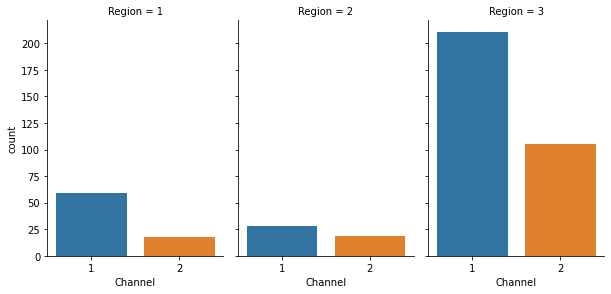

In [7]:
sns.catplot(x="Channel", col="Region",
                data=df, kind="count",
                height=4, aspect=.7);

### Relative CHANNEL frequencies as Percentage

In [8]:
df.Channel.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

1    67.73%
2    32.27%
Name: Channel, dtype: object

### Relative REGION frequencies as Percentage

In [9]:
df.Region.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

3    71.82%
1     17.5%
2    10.68%
Name: Region, dtype: object

### Analyze the number of items for the Region and Channel Pair.

In [10]:
df.groupby(['Channel','Region']).size().unstack(fill_value=0)

Region,1,2,3
Channel,,,
1,59,28,211
2,18,19,105


### Analyze pairwise relationships by different Channel.

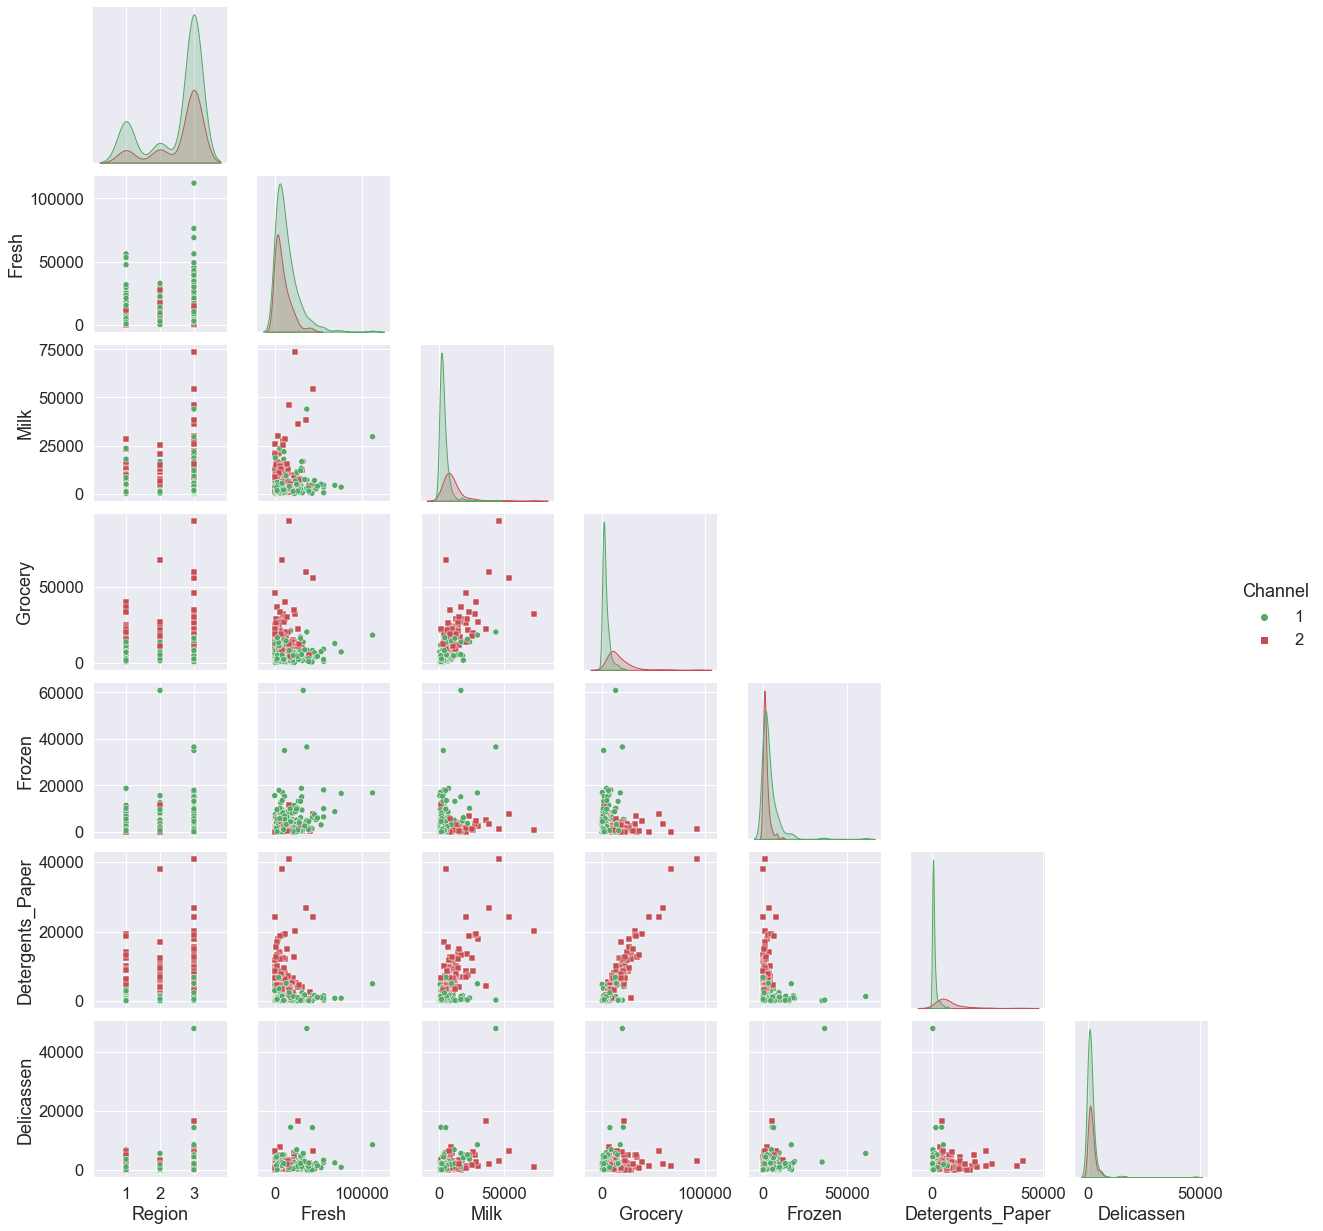

In [11]:
sns.set(font_scale=1.5)

sns.pairplot(df, 
             hue="Channel", 
             markers=["o", "s"], 
            palette=['g','r'],
             corner=True,
             )


### Analyze pairwise relationships by different Region.

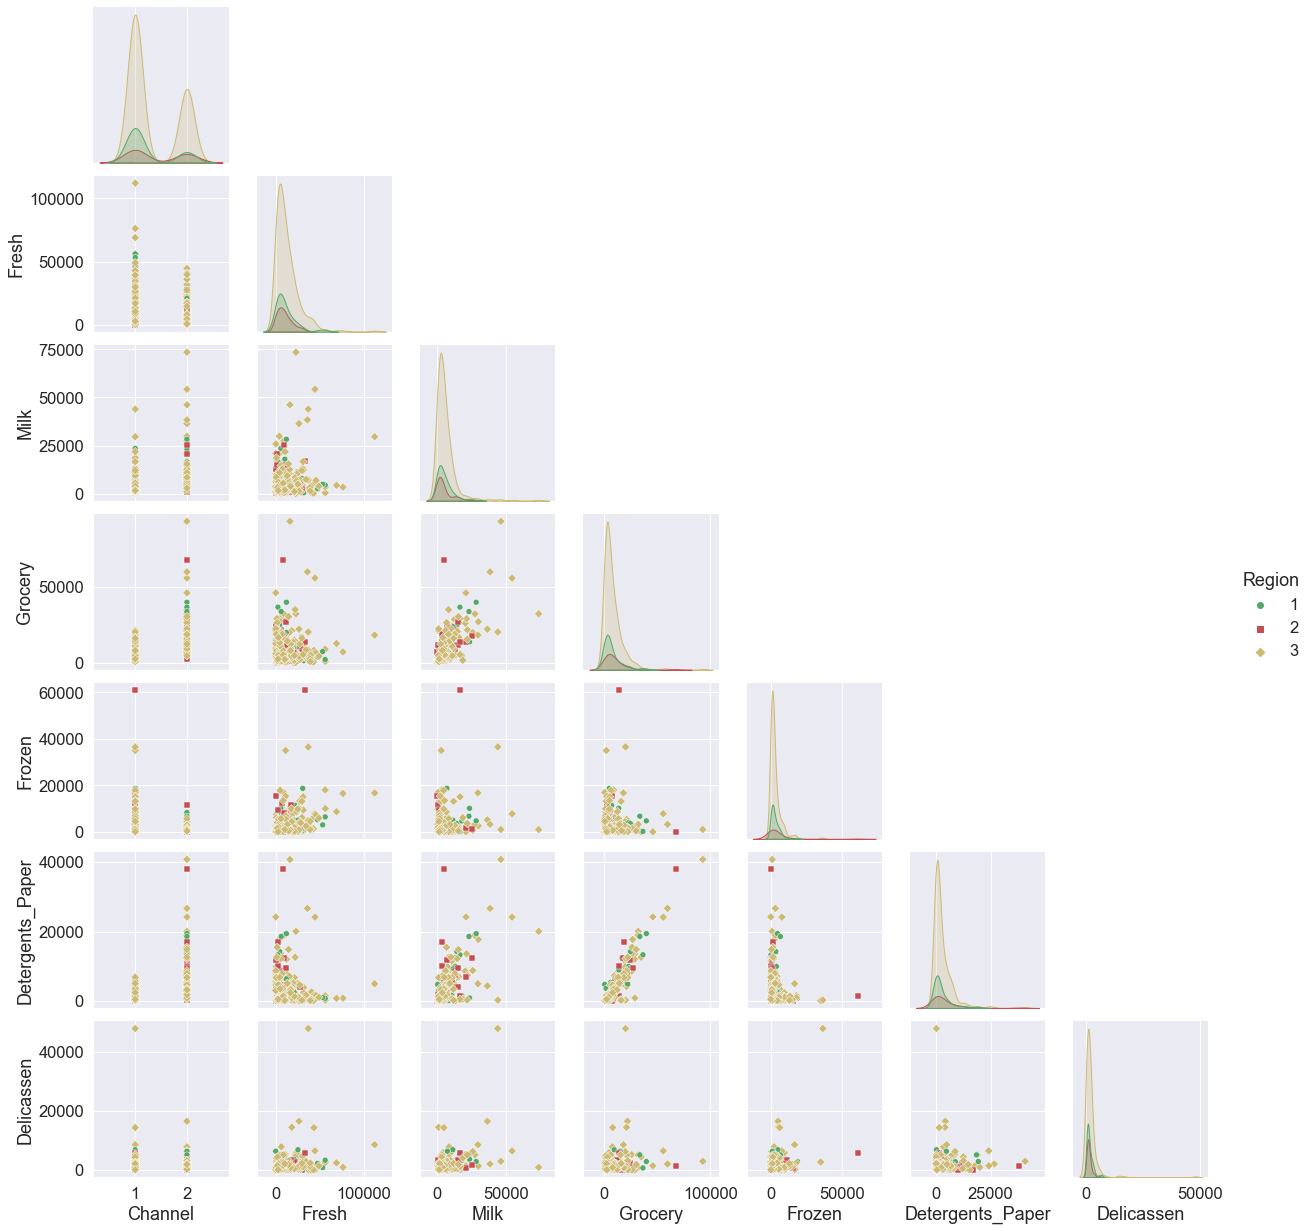

In [12]:
sns.pairplot(df, 
             hue="Region", 
             markers=["o", "s","D"], 
             palette=['g','r','y'],
             corner=True,
             )


In [13]:
col = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

### Generate descriptive statistics

In [14]:
df[col].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Plot and Understand the correlation between different product categories

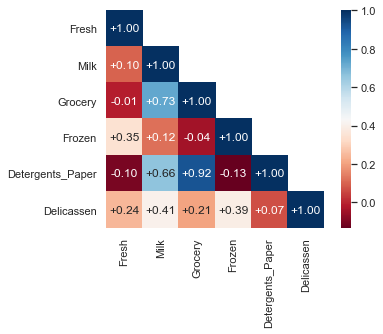

In [15]:
sns.set(font_scale=1)

corr = df[col].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.2f')

### Standardize features by removing the mean and scaling to unit variance.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features_df = pd.DataFrame(scaler.fit_transform(df[col].astype(np.float)),
                               index=df.index, columns=df[col].columns)

In [17]:
scaled_features_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


### Understand Outliers and the Box plot shows the distributions with respect to categories.

<AxesSubplot:>

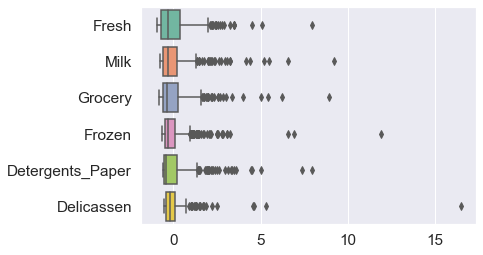

In [18]:
sns.set(font_scale=1.4)

sns.boxplot(data=scaled_features_df, orient="h", palette="Set2")

###  Remove all rows that have outliers in at least one column

In [19]:
from scipy import stats
scaled_features_df = scaled_features_df[(np.abs(stats.zscore(scaled_features_df)) < 3).all(axis=1)]

### Apply Dimensionality reduction using PCA

Amount of variance explained by each components
[1.17105963 0.59735635 0.32253338 0.19172006 0.11556379 0.05290053]

Percentage of variance explained by each components
[0.47776244 0.24370614 0.13158539 0.07821689 0.04714708 0.02158206]

Total Percentage of variance explained by ALL of the selected components 1.0


([<matplotlib.axis.XTick at 0x1a9fb9eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

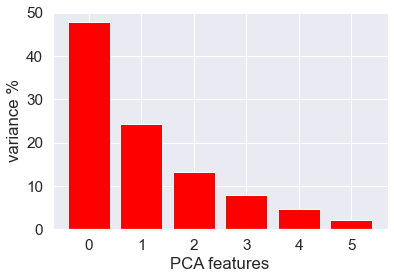

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

principalComponents = pca.fit_transform(scaled_features_df)

# access values and vectors
# print(pca.components_)
print(f'Amount of variance explained by each components\n{pca.explained_variance_}\n')
print(f'Percentage of variance explained by each components\n{pca.explained_variance_ratio_}\n')
print(f'Total Percentage of variance explained by ALL of the selected components {pca.explained_variance_ratio_.sum()}')

# transform data
reduced_df = pca.transform(scaled_features_df)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_*100, color='Red')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

### Compute k-means clustering.

In [21]:
from sklearn.cluster import KMeans

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(init="k-means++",
                n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=42)

# fitting the k means algorithm on scaled data
kmeans.fit(reduced_df)

KMeans(n_clusters=3, random_state=42)

####  The lowest SSE value 

In [22]:
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
# Error Sum of Squares (SSE) is the sum of the squared differences between each observation and its group's mean. 
# It can be used as a measure of variation within a cluster. 
# If all cases within a cluster are identical the SSE would then be equal to 0.

kmeans.inertia_

508.4182110283795

#### Final locations of the centroid

In [23]:
kmeans.cluster_centers_

array([[-3.66513525e-01, -4.85846983e-01,  3.58509221e-04,
         3.53304584e-02, -1.63383246e-02,  7.92570158e-03],
       [ 1.70284451e+00,  1.06350441e-01,  2.91796240e-02,
        -5.65340094e-02,  8.48002893e-03, -1.77080746e-02],
       [-7.52956925e-01,  9.80737896e-01, -2.76411445e-02,
        -2.64223291e-02,  2.84694539e-02, -1.30362889e-03]])

#### The number of iterations required to converge

In [24]:
kmeans.n_iter_

8

### Fitting multiple k-means algorithms and storing the values in an empty list. 
> The list holds the SSE values for each k

In [25]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 50,
    "max_iter": 500,
    "random_state": 42,
}

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(reduced_df)
    sse.append(kmeans.inertia_)

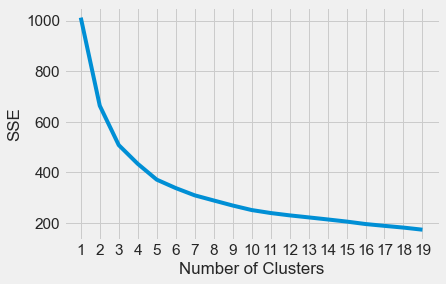

In [26]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 20), sse)
 plt.xticks(range(1, 20))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

### Knee/Elbow Point Detection

If curve=”concave”, kneed will detect knees. If curve=”convex”, it will detect elbows. If the knee/elbow you are trying to identify is on a positive slope use direction=”increasing”, if the knee/elbow you are trying to identify is on a negative slope, use direction=”decreasing”. 

In [27]:
from kneed import DataGenerator, KneeLocator

kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [28]:
# k means using 5 clusters and k-means++ initialization
kmeans_pca = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans_pca.fit(reduced_df)

KMeans(n_clusters=3, n_jobs=-1)

In [29]:
df_kmeans = pd.concat([scaled_features_df.reset_index(drop=True), pd.DataFrame(reduced_df)],axis=1)
df_kmeans.columns.values[-5:] = ['Component-1', 'Component-2', 'Component-3', 'Component-4', 'Component-5']

In [30]:
df_kmeans['cluster'] = kmeans_pca.labels_

In [31]:
df_kmeans.cluster.value_counts().to_frame("Values_count")

,Values_count
0,223
2,100
1,91


<AxesSubplot:xlabel='Component-1', ylabel='Component-2'>

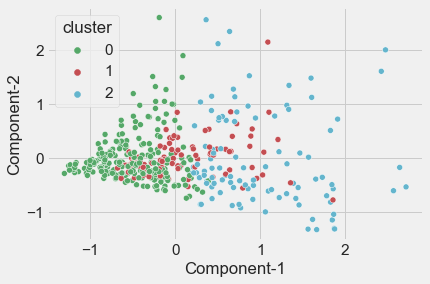

In [32]:
sns.scatterplot(data=df_kmeans, 
                x="Component-1", 
                y="Component-2", 
                palette=['g','r','c'],
                hue="cluster")

<AxesSubplot:xlabel='Component-2', ylabel='Component-3'>

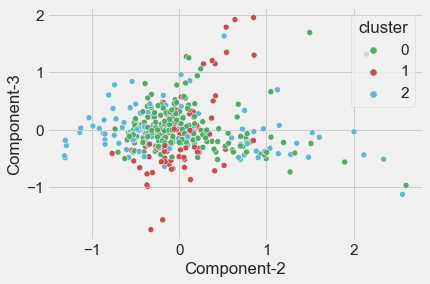

In [33]:
sns.scatterplot(data=df_kmeans, 
                x="Component-2", 
                y="Component-3", 
                palette=['g','r','c'],
                hue="cluster")

<AxesSubplot:xlabel='Component-1', ylabel='Component-5'>

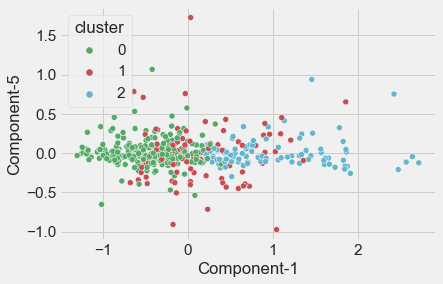

In [34]:
sns.scatterplot(data=df_kmeans, 
                x="Component-1", 
                y="Component-5", 
                palette=['g','r','c'],
                hue="cluster")